In [57]:
import pandas as pd

# Load the dataset
df = pd.read_csv("holiday_sales_dataset.csv")

# Display the first few rows to understand its structure
print(df.head())


     Invoice StockCode  Description  Quantity InvoiceDate  Price($)  \
0  INV000000    SC8050  Product 116         3  2024-11-29    133.16   
1  INV000001    SC6661  Product 380         3  2024-03-26     68.97   
2  INV000002    SC3296   Product 65         1  2025-01-30    192.39   
3  INV000003    SC8824  Product 171        10  2025-01-16     64.76   
4  INV000004    SC1524  Product 153         7  2024-03-27     85.84   

   CustomerID Country  Holiday   Sales  
0      4910.0  Canada        0  399.48  
1      1433.0  Canada        0  206.91  
2      2802.0  Canada        0  192.39  
3      3801.0  Canada        0  647.60  
4      1873.0  Canada        0  600.88  


In [59]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if necessary)
df = df.dropna()


Invoice            0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
Price($)       25000
CustomerID     25000
Country            0
Holiday            0
Sales              0
dtype: int64


In [61]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Ensure 'Quantity' and 'Price' are numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price($)'] = pd.to_numeric(df['Price($)'], errors='coerce')


In [63]:
# Remove duplicate rows
df = df.drop_duplicates()



In [65]:
# Filter out negative quantities or prices
df = df[df['Quantity'] > 0]
df = df[df['Price($)'] > 0]


In [67]:
# Get descriptive statistics
print(df.describe())



            Quantity                    InvoiceDate       Price($)  \
count  475000.000000                         475000  475000.000000   
mean        5.499469  2024-12-30 14:28:02.465683712     102.527600   
min         1.000000            2024-01-01 00:00:00       5.000000   
25%         3.000000            2024-06-30 00:00:00      53.800000   
50%         6.000000            2024-12-31 00:00:00     102.530000   
75%         8.000000            2025-07-01 00:00:00     151.290000   
max        10.000000            2025-12-31 00:00:00     200.000000   
std         2.871912                            NaN      56.311132   

          CustomerID        Holiday          Sales  
count  475000.000000  475000.000000  475000.000000  
mean     2999.078192       0.006777     508.108752  
min      1000.000000       0.000000   -1998.600000  
25%      1998.000000       0.000000     157.000000  
50%      2999.500000       0.000000     402.640000  
75%      3998.000000       0.000000     812.110000 

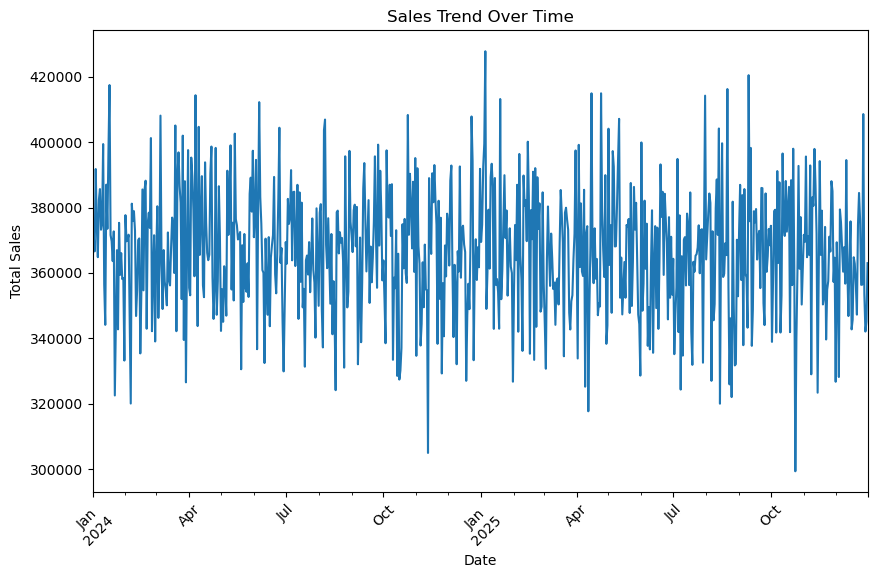

In [69]:
import matplotlib.pyplot as plt

# Create a 'TotalSales' column
df['TotalSales'] = df['Quantity'] * df['Price($)']

# Plot sales trends over time
df.groupby('InvoiceDate')['TotalSales'].sum().plot(figsize=(10, 6))
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


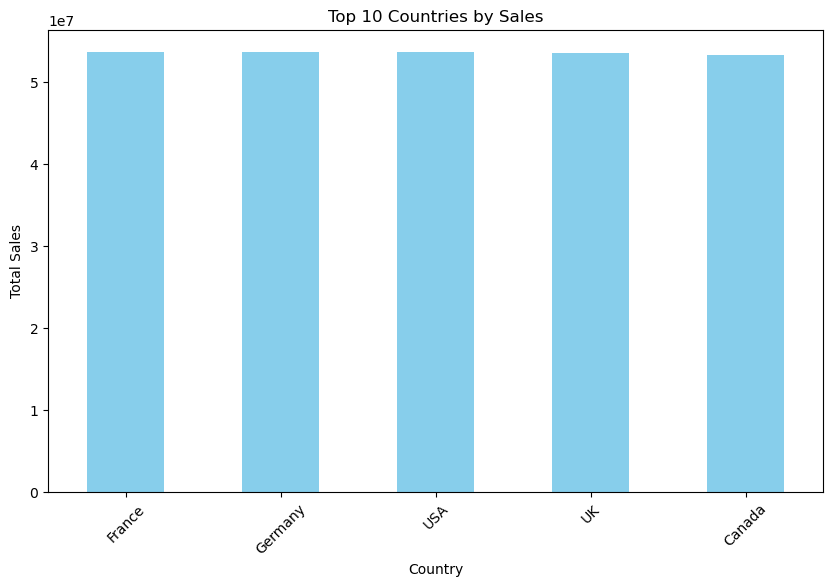

In [71]:
# Aggregate sales by country
sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Plot the sales by country
sales_by_country.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


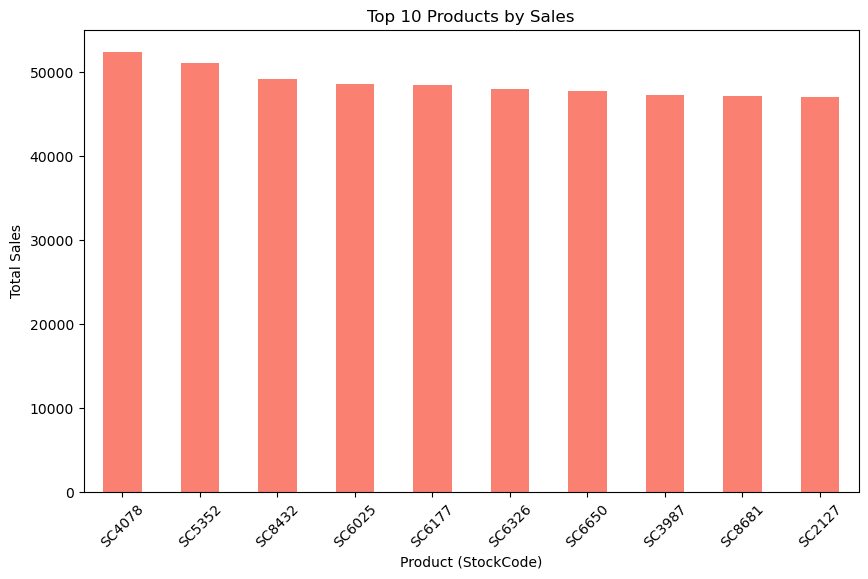

In [73]:
# Aggregate sales by product (StockCode)
sales_by_product = df.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False)

# Plot the top 10 products by sales
sales_by_product.head(10).plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product (StockCode)")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


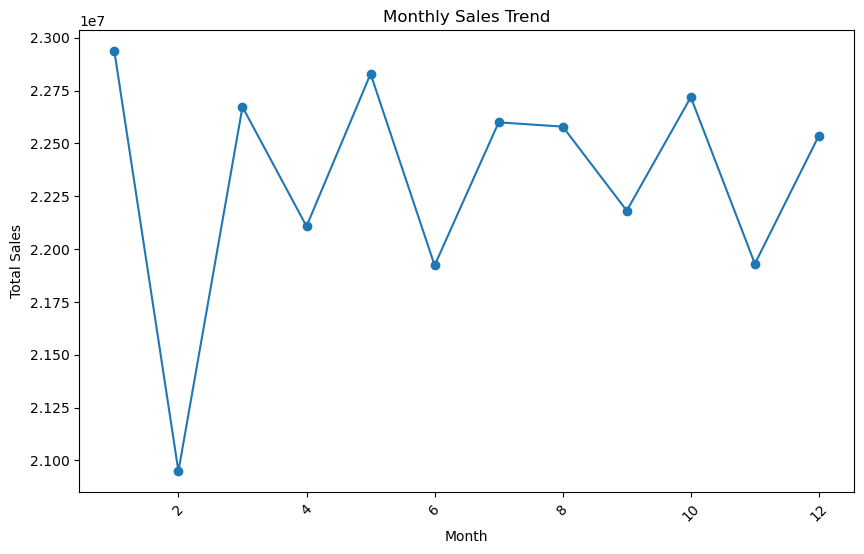

In [75]:
# Extract month and year from InvoiceDate
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# Aggregate total sales by month
monthly_sales = df.groupby('Month')['TotalSales'].sum()

# Plot monthly sales trend
monthly_sales.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


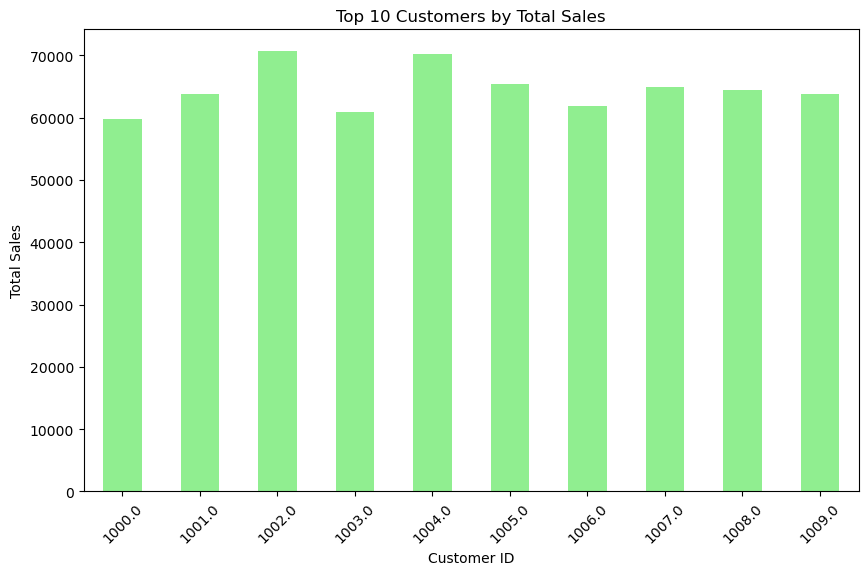

In [77]:
# Calculate the number of purchases per customer
customer_purchases = df.groupby('CustomerID')['TotalSales'].sum()

# Plot the top 10 customers by total sales
customer_purchases.head(10).plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [79]:
from scipy import stats

# Create a 'Holiday' column (assuming holidays are based on some specific dates, e.g., Christmas)
holidays = ['2024-12-25', '2025-01-01']  # Example holidays
df['Holiday'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d').isin(holidays).astype(int)

# Split data into holiday and non-holiday sales
holiday_sales = df[df['Holiday'] == 1]['TotalSales']
non_holiday_sales = df[df['Holiday'] == 0]['TotalSales']

# Perform a T-test
t_stat, p_value = stats.ttest_ind(holiday_sales, non_holiday_sales)

# Output the result
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -0.14865263280393248, P-value: 0.8818278024893079
